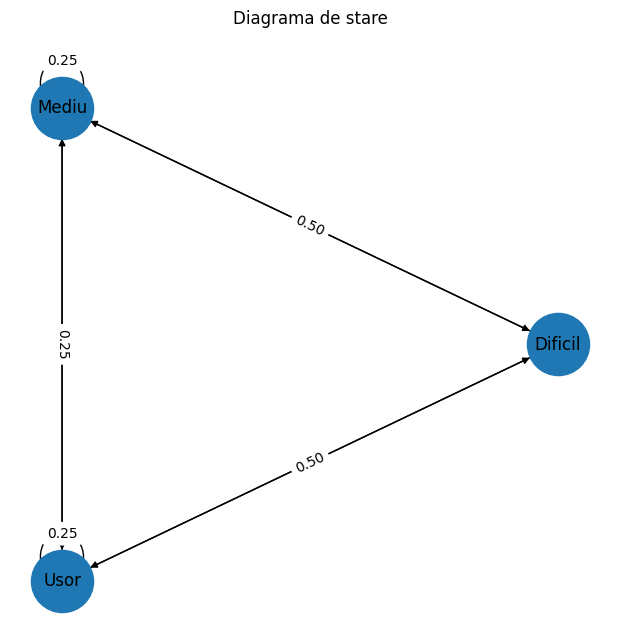

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
import networkx as nx

# Define the state space
states = ["Dificil", "Mediu", "Usor"]
n_states = len(states)

# Define the observation space
observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

# Define the initial state distribution
state_probability = np.array([1/3, 1/3, 1/3])

# Define the state transition probabilities
transition_probability = np.array([[0, 0.5, 0.5],
                                   [0.5, 0.25, 0.25],
                                   [0.5, 0.25, 0.25]])

# Define the observation likelihoods
emission_probability= np.array([[0.1, 0.2, 0.4, 0.3],
                                [0.15, 0.25, 0.5, 0.1],
                                [0.2, 0.3, 0.4, 0.1]])

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


# Crearea grafului de tranziție
G = nx.DiGraph()

# Adaugam nodurile, si muchiile
for i in range(n_states):
    for j in range(n_states):
        if transition_probability[i, j] > 0:
            G.add_edge(states[i], states[j], weight=transition_probability[i, j])

pos = nx.circular_layout(G)

plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, arrows=True)

# adaugam probabilitatile pe muchii
edge_labels = {(states[i], states[j]): f"{transition_probability[i, j]:.2f}" 
               for i in range(n_states) for j in range(n_states) if transition_probability[i, j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Diagrama de stare")
plt.show()


In [7]:
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)
observations_sequence

# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [2 2 0 2 0 1 0 2 0 2 0 1]
